In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Merging and Cleaning

In [ ]:
train_vals = pd.read_csv(r"MMA 869/Training features.csv")

In [ ]:
train_vals.shape

In [ ]:
train_labels = pd.read_csv(r"MMA 869/Training labels.csv")

In [ ]:
train_data = pd.merge(train_vals, train_labels, on='id', how='left')

In [ ]:
test_data = pd.read_csv(r"MMA 869/Test set values.csv")

In [ ]:
def display_dataframe_without_trim():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', 100)
    
display_dataframe_without_trim()

In [ ]:
train_data.head(50)

In [ ]:
train_data.shape

In [ ]:
test_data.shape

### Missing values

In [ ]:
train_data.isna().sum()

In [ ]:
# columns with NAs are funder, installer, subvillage, public_meeting, scheme_management, scheme_name, permit

In [ ]:
# dropping columns based on intuition

In [ ]:
train_data.recorded_by.unique()

In [ ]:
# How many waterpoints are permitted
train_data.permit.value_counts()

In [ ]:
'''
drop these columns: wpt_name, region, recorded_by,extraction_type_group,extraction_type_class,payment,quality_group,
quantity_group,source_type,water_point_type_group
'''
train_data.drop(columns=['wpt_name','region','recorded_by','extraction_type_group','extraction_type_class',
                        'payment','quality_group','quantity_group','source_type','waterpoint_type_group'], inplace=True)

In [ ]:
test_data.drop(columns=['wpt_name','region','recorded_by','extraction_type_group','extraction_type_class',
                        'payment','quality_group','quantity_group','source_type','waterpoint_type_group'], inplace=True)

In [ ]:
train_data.shape

In [ ]:
train_data.head()

In [ ]:
train_data.source.nunique()

In [ ]:
train_data.funder.value_counts()

In [ ]:
# handling NAs for funder
df = train_data.funder.value_counts().to_frame().reset_index()

# replace with mode
train_data.loc[train_data.funder.isna(), 'funder'] = train_data.funder.mode().values[0]

In [ ]:
train_data.installer.value_counts()

In [ ]:
train_data.installer.isna().sum()

In [ ]:
# Installer NAs
df = train_data.installer.value_counts().to_frame().reset_index()
# few = df.loc[df.installer < 5, 'index']

# replace with mode
train_data.loc[train_data.installer.isna(), 'installer'] = train_data.installer.mode().values[0]

In [ ]:
# subvillage NAs - replace with mode
train_data.loc[train_data.subvillage.isna(), 'subvillage'] = train_data.subvillage.mode().values[0]

In [ ]:
# public meeting NAs
train_data.public_meeting.value_counts()

In [ ]:
# replace with mode
train_data.loc[train_data.public_meeting.isna(), 'public_meeting'] = train_data.public_meeting.mode().values[0]

In [ ]:
# scheme_management NAs
train_data.scheme_management.value_counts()

In [ ]:
# replace with mode
train_data.loc[train_data.scheme_management.isna(), 
               'scheme_management'] = train_data.scheme_management.mode().values[0]
# correct 'None' record
train_data.loc[train_data.scheme_management == 'None', 'scheme_management'] = 'Other'

In [ ]:
# scheme_name NAs
train_data.scheme_name.nunique()

In [ ]:
train_data.scheme_name.isna().sum()

In [ ]:
def impute_scheme_name(row):
    if row.scheme_name == 0:
        ward = row.ward
        df = train_data[train_data.ward == ward]
        try:
            m = df.scheme_name.unique()[1]
            return(m)
        except:
            return (train_data.loc[train_data.scheme_name != 0, 'scheme_name'].mode().values[0])
    else:
        return (row.scheme_name)

In [ ]:
train_data.loc[train_data.scheme_name.isna(), 'scheme_name'] = train_data.scheme_name.mode().values[0]

In [ ]:
# Permit NAs
train_data.permit.value_counts()

In [ ]:
# replace with mode
train_data.loc[train_data.permit.isna(), 'permit'] = train_data.permit.mode().values[0]

In [ ]:
train_data.shape

#### Missing values - Test Data

In [ ]:
test_data.isna().sum()

In [ ]:
# handle funder, installer, public_meeting,scheme_management, permit cols

In [ ]:
# handling NAs for funder
# replace with mode
test_data.loc[test_data.funder.isna(), 'funder'] = test_data.funder.mode().values[0]

In [ ]:
# Installer NAs
# replace with mode
test_data.loc[test_data.installer.isna(), 'installer'] = test_data.installer.mode().values[0]

In [ ]:
# replace with mode
test_data.loc[test_data.subvillage.isna(), 'subvillage'] = test_data.subvillage.mode().values[0]

In [ ]:
# public meeting NAs
test_data.public_meeting.value_counts()

In [ ]:
# replace with mode
test_data.loc[test_data.public_meeting.isna(), 'public_meeting'] = test_data.public_meeting.mode().values[0]

In [ ]:
# scheme_name NAs
# replace with mode
test_data.loc[test_data.scheme_name.isna(), 'scheme_name'] = test_data.scheme_name.mode().values[0]

In [ ]:
test_data.isna().sum()

In [ ]:
# scheme_management NAs
test_data.scheme_management.value_counts()

In [ ]:
# replace with mode
test_data.loc[test_data.scheme_management.isna(), 
               'scheme_management'] = test_data.scheme_management.mode().values[0]

In [ ]:
# replace with mode
test_data.loc[test_data.permit.isna(), 'permit'] = test_data.permit.mode().values[0]

### More cleaning and EDA

In [ ]:
train_data.head(50)

In [ ]:
# amount_tsh column
# how many records are zeros?
train_data[train_data.amount_tsh==0.00].shape[0]

In [ ]:
# date recorded -- ensure it's date format
train_data.date_recorded = pd.to_datetime(train_data.date_recorded)
test_data.date_recorded = pd.to_datetime(test_data.date_recorded)

In [ ]:
# gps_height column
# how many records are zeros or neg?
train_data[train_data.gps_height<1].shape[0]

In [ ]:
def impute_gps_height(row):
    if row.gps_height <= 0:
        basin = row.basin
        return (train_data.loc[(train_data.basin==basin)&(train_data.gps_height >0), 'gps_height'].median())
    else:
        return(row.gps_height)

In [ ]:
# use median imputation
train_data.loc[train_data.gps_height < 1, 'gps_height'] = train_data.loc[train_data.gps_height > 0,
                                                                         'gps_height'].median()

test_data.loc[test_data.gps_height < 1, 'gps_height'] = test_data.loc[test_data.gps_height > 0,
                                                                         'gps_height'].median()

In [ ]:
# installer column
x = train_data.installer.value_counts().to_frame().reset_index()

In [ ]:
top = x['index'][:8]

In [ ]:
# test data
x = test_data.installer.value_counts().to_frame().reset_index()
top = x['index'][:8]

In [ ]:
# num_private column
# how many records are zeros or neg?
train_data[train_data.num_private < 1].shape[0]

In [ ]:
# drop the column
train_data.drop(columns=['num_private'], inplace=True)
test_data.drop(columns=['num_private'], inplace=True)

In [ ]:
# basin column
train_data.basin.nunique()

In [ ]:
train_data.basin.value_counts()

In [ ]:
test_data.basin.value_counts()

In [ ]:
# lga column
train_data.lga.nunique()

In [ ]:
# ward column
train_data.ward.nunique()

In [ ]:
# population column
# how many records are zero?
train_data[train_data.population == 0].shape[0]

In [ ]:
# mean imputation
train_data.loc[train_data.population == 0, 'population'] = train_data.loc[train_data.population != 0, 
                                                                          'population'].mean()
test_data.loc[test_data.population == 0, 'population'] = test_data.loc[test_data.population != 0, 
                                                                          'population'].mean()

In [ ]:
def pop_imputer(row):
    if row.population <= 0:
        row_district = row.district_code
        impute = train_data.loc[train_data.district_code == row_district, 'population'].mean()
        if impute == 0:
            return (train_data.loc[train_data.population != 0, 'population'].median())
        else:
            return (impute)
    else:
        return (row.population)

In [ ]:
# scheme_management column
train_data.scheme_management.value_counts()

In [ ]:
test_data.scheme_management.value_counts()

In [ ]:
# construction_year column
# how many zeros?
train_data.loc[train_data.construction_year == 0, 'construction_year'].shape[0]

In [ ]:
# use mean imputation
train_data.loc[train_data.construction_year == 0, 'construction_year'] = int(train_data.loc[train_data.construction_year != 0, 
                                                                          'construction_year'].mean())

test_data.loc[test_data.construction_year == 0, 'construction_year'] = int(test_data.loc[test_data.construction_year != 0, 
                                                                          'construction_year'].mean())

In [ ]:
# extraction_type column
x = train_data.extraction_type.value_counts().to_frame().reset_index()

In [ ]:
top = x['index'][:9]

In [ ]:
# management column
x = train_data.management.value_counts().to_frame().reset_index()
top = x['index'][:6]

In [ ]:
# management_group column
train_data.management_group.value_counts()

In [ ]:
# drop this column, management is informative enough
train_data.drop(columns=['management_group'], inplace=True)
test_data.drop(columns=['management_group'], inplace=True)

In [ ]:
# payment_type column
train_data.payment_type.value_counts()

In [ ]:
# water quality column
train_data.water_quality.value_counts()

In [ ]:
# quantity column
train_data.quantity.value_counts()

In [ ]:
# source column
train_data.source.value_counts()

In [ ]:
# source class column
train_data.source_class.value_counts()

In [ ]:
# waterpoint_type column
train_data.waterpoint_type.value_counts()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_data.head()

### Feature engineering

In [ ]:
# convert date_recorded to record_age
today = dt.datetime.today()
today

In [ ]:
train_data['record_age'] = train_data['date_recorded'].apply(lambda row: (today -  row).days)
test_data['record_age'] = test_data['date_recorded'].apply(lambda row: (today -  row).days)

In [ ]:
# we can drop date_recorded
train_data.drop(columns = ['date_recorded'], inplace=True)
test_data.drop(columns = ['date_recorded'], inplace=True)

In [ ]:
train_data.record_age

In [ ]:
# permit and public_meeting booleans converted to strings
train_data.permit = train_data.permit.astype('category')
train_data.public_meeting = train_data.public_meeting.astype('category')

test_data.permit = test_data.permit.astype('category')
test_data.public_meeting = test_data.public_meeting.astype('category')

In [ ]:
x_train = train_data.loc[:, ~train_data.columns.isin(['status_group'])]
y_train = train_data.status_group

In [ ]:
x_train.head(20)

In [ ]:
# add amount_tsh per pop as new feature
x_train['tsh_per_head'] = x_train['amount_tsh'] / x_train['population']
test_data['tsh_per_head'] = test_data['amount_tsh'] / test_data['population']

In [ ]:
x_train.to_csv(r"Train_data_final.csv", index=False)

In [ ]:
test_data.to_csv(r"Test_data_final.csv", index=False)

In [7]:
x_train = pd.read_csv("Train_data_final.csv")

In [8]:
test_data = pd.read_csv("Test_data_final.csv")

In [9]:
y_train_2 = pd.read_csv('MMA 869/Training labels.csv')

In [10]:
y_train = y_train_2['status_group']

In [11]:
# categorical features
s = (x_train.dtypes == 'object')
cat_cols = list(s[s].index)

In [12]:
cat_cols

['funder',
 'installer',
 'basin',
 'subvillage',
 'lga',
 'ward',
 'scheme_management',
 'scheme_name',
 'extraction_type',
 'management',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type']

In [13]:
one_hot_cols = ['basin', 'scheme_management','extraction_type','management','payment_type','water_quality','quantity',
               'source','source_class','waterpoint_type']
cat_cols = list(set(cat_cols).difference(one_hot_cols))

In [14]:
# numerical features
s = (x_train.dtypes != 'object')
num_cols = list(s[s].index)

In [64]:
cat_cols

['subvillage', 'ward', 'lga', 'funder', 'scheme_name', 'installer']

In [15]:
# remove id, longitude, latitude
to_remove = ['id','public_meeting', 'permit']
for j in to_remove:
    num_cols.remove(j)
num_cols

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'record_age',
 'tsh_per_head']

In [16]:
x_train.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [17]:
# quantity is ordinal, remove it from cat_cols
ord_cols = ['quantity']
one_hot_cols.remove('quantity')

In [18]:
# create mapping for quantity column
mapper = {'unknown':0, 'dry':1, 'seasonal':2, 'insufficient':3, 'enough':4}

In [19]:
x_train['quantity'] = x_train['quantity'].replace(mapper)
test_data['quantity'] = test_data['quantity'].replace(mapper)

In [ ]:
x_train['qty_per_head'] = x_train.quantity / x_train.population
test_data['qty_per_head'] = test_data.quantity / test_data.population
num_cols.append('qty_per_head')

In [20]:
# encode one_hot_cols with OnehotEncoder
from sklearn.preprocessing import OneHotEncoder
oneHotEnc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [21]:
fit = oneHotEnc.fit_transform(x_train[one_hot_cols])
x_train_oneH = pd.DataFrame(fit, columns=oneHotEnc.get_feature_names())
fit_ = oneHotEnc.transform(test_data[one_hot_cols])
test_data_oneH = pd.DataFrame(fit_, columns=oneHotEnc.get_feature_names())

D:\MMA\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\MMA\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
cat_cols

['subvillage', 'ward', 'lga', 'funder', 'scheme_name', 'installer']

In [65]:
# Trying Label encoding
from sklearn.preprocessing import OrdinalEncoder

In [66]:
encoder = OrdinalEncoder()

In [67]:
x_train.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,...,extraction_type,management,payment_type,water_quality,quantity,source,source_class,waterpoint_type,record_age,tsh_per_head
0,69572,6000.0,1548,1390,1706,34.938093,-9.856322,Lake Nyasa,13116,11,...,gravity,vwc,annually,soft,4,spring,groundwater,communal standpipe,4149,55.045872
1,8776,0.0,522,1399,610,34.698766,-2.147466,Lake Victoria,17596,20,...,gravity,wug,never pay,soft,3,rainwater harvesting,surface,communal standpipe,3426,0.000000
2,34310,25.0,924,686,2296,37.460664,-3.821329,Pangani,10096,21,...,gravity,vwc,per bucket,soft,4,dam,surface,communal standpipe multiple,3435,0.100000
3,67743,0.0,1961,263,2078,38.486161,-11.155298,Ruvuma / Southern Coast,9998,90,...,submersible,vwc,never pay,soft,1,machine dbh,groundwater,communal standpipe multiple,3463,0.000000
4,19728,0.0,20,1194,133,31.130847,-1.825359,Lake Victoria,8583,18,...,gravity,other,never pay,soft,2,rainwater harvesting,surface,communal standpipe,4028,0.000000


In [70]:
for col in cat_cols:
    encoder.fit(pd.concat([x_train[col], test_data[col]], axis=0, sort=False))
    x_train[col] = encoder.transform(x_train[col])
    test_data[col] = encoder.transform(test_data[col])

ValueError: Expected 2D array, got 1D array instead:
array=[13116 17596 10096 ...  4755 15803  5205].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [71]:
x_train_enc = x_train[cat_cols]
test_data_enc = test_data[cat_cols]

In [21]:
# Trying count encoding
import category_encoders as ce

In [ ]:
# count_enc = ce.CountEncoder()
# x_train_enc = count_enc.fit_transform(x_train[cat_cols])
# x_train_enc.head()

In [28]:
x_train_enc.head()

,subvillage,ward,lga,funder,scheme_name,installer
0,13116,1429,51,1548,2388,1706
1,17596,1581,103,522,644,610
2,10096,1629,108,924,2261,2296
3,9998,1576,87,1961,644,2078
4,8583,1692,26,20,644,133


In [29]:
# scale numerical attributes
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
num_cols = num_cols + ord_cols

In [31]:
num_cols, cat_cols

(['amount_tsh',
  'gps_height',
  'longitude',
  'latitude',
  'region_code',
  'district_code',
  'population',
  'construction_year',
  'record_age',
  'tsh_per_head',
  'quantity'],
 ['subvillage', 'ward', 'lga', 'funder', 'scheme_name', 'installer'])

In [32]:
x_train_scaled = scaler.fit_transform(x_train[num_cols])
x_train_scaled = pd.DataFrame(x_train_scaled, columns=num_cols)
test_data_scaled = scaler.transform(test_data[num_cols])
test_data_scaled = pd.DataFrame(test_data_scaled, columns=num_cols)

x_train_enc_scaled = scaler.fit_transform(x_train_enc)
x_train_enc_scaled = pd.DataFrame(x_train_enc_scaled, columns=x_train_enc.columns)
test_data_enc_scaled = scaler.transform(test_data_enc)
test_data_enc_scaled = pd.DataFrame(test_data_enc_scaled, columns=test_data_enc.columns)

In [33]:
x_train_enc.head()

,subvillage,ward,lga,funder,scheme_name,installer
0,13116,1429,51,1548,2388,1706
1,17596,1581,103,522,644,610
2,10096,1629,108,924,2261,2296
3,9998,1576,87,1961,644,2078
4,8583,1692,26,20,644,133


In [34]:
x_train_trans = pd.concat([x_train_scaled, x_train_enc_scaled, x_train_oneH], axis=1)
test_data_trans = pd.concat([test_data_scaled, test_data_enc_scaled, test_data_oneH], axis=1)

In [35]:
x_train_trans.shape

(59400, 102)

In [36]:
test_data_trans.shape

(14850, 102)

In [37]:
x_train_trans.head()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,record_age,tsh_per_head,...,x7_groundwater,x7_surface,x7_unknown,x8_cattle trough,x8_communal standpipe,x8_communal standpipe multiple,x8_dam,x8_hand pump,x8_improved spring,x8_other
0,1.895665,0.594894,0.131052,-1.408791,-0.244325,-0.065370,-3.809244e-01,0.245140,1.141136,0.037539,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.105970,0.613995,0.094610,1.207934,0.267409,-0.376781,-2.406504e-03,1.337149,-1.022152,-0.091202,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.097630,-0.899219,0.515158,0.639751,0.324269,-0.169174,-6.881315e-02,1.237876,-0.995223,-0.090968,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.105970,-1.796960,0.671308,-1.849720,4.247564,5.955245,-4.938157e-01,-1.045415,-0.911444,-0.091202,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.105970,0.178919,-0.448669,1.317271,0.153691,-0.480585,1.258260e-16,-0.052680,0.779092,-0.091202,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [124]:
y_train.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [38]:
test_data_trans.head()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,record_age,tsh_per_head,...,x7_groundwater,x7_surface,x7_unknown,x8_cattle trough,x8_communal standpipe,x8_communal standpipe multiple,x8_dam,x8_hand pump,x8_improved spring,x8_other
0,-0.105970,1.881020,0.184758,0.558839,0.324269,-0.272978,0.088349,1.535696,-0.932389,-0.091202,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.105970,0.974789,0.392742,0.813586,-0.756059,-0.376781,0.041865,0.344414,-0.932389,-0.091202,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.105970,0.970545,0.105131,0.238184,-0.130606,-0.376781,0.484576,1.337149,-0.923412,-0.091202,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.105970,-1.788471,0.606120,-1.260233,3.678970,3.879171,-0.068813,-0.946142,-0.893491,-0.091202,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.060833,0.318992,0.141411,-1.780173,-0.301184,-0.272978,-0.489389,0.344414,-1.084986,-0.071712,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Scheme_name doesn't add predictive power

In [40]:
x_train_trans.drop(columns=['scheme_name'], inplace=True)

In [41]:
test_data_trans.drop(columns=['scheme_name'], inplace=True)

### Feature selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
logistic = LogisticRegression(C=0.5, penalty="l1", random_state=42, solver='liblinear')

In [ ]:
# log_fit = logistic.fit(x_train_trans, y_train)

In [ ]:
# model = SelectFromModel(log_fit, prefit=True)

In [ ]:
# x_new = model.transform(x_train_trans)

In [ ]:
# Get back the kept features as a DataFrame with dropped columns as all 0s
# selected_features = pd.DataFrame(model.inverse_transform(x_new), index=x_train_trans.index, 
#                                  columns=x_train_trans.columns)

In [ ]:
# Dropped columns have values of all 0s, keep other columns 
# selected_columns = selected_features.columns[selected_features.var() != 0]

In [ ]:
# selected_columns.shape

## Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
x_train_trans.to_csv(r'xtrainfinal.csv',index = 'id')

#### Random forest

In [67]:
forest = RandomForestClassifier(random_state=42, n_estimators=1250, min_samples_split=5,min_samples_leaf = 1,
                                oob_score=True, n_jobs=-1, max_features='sqrt', bootstrap=True,max_depth= 80,criterion='log_loss')

In [43]:
Extra = ExtraTreesClassifier(random_state=42, n_estimators=1250, min_samples_split=5,min_samples_leaf = 1,
                                oob_score=True, n_jobs=-1, max_features='sqrt', bootstrap=True,max_depth= 80)

In [44]:
Extra.fit(x_train_trans, y_train)

ExtraTreesClassifier(bootstrap=True, max_depth=80, min_samples_split=5,
                     n_estimators=1250, n_jobs=-1, oob_score=True,
                     random_state=42)

In [102]:
forest.fit(x_train_trans, y_train)


D:\MMA\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=80, max_features='auto',
                       min_samples_split=5, n_estimators=1250, n_jobs=-1,
                       oob_score=True, random_state=42)

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [103]:
forest.oob_score_

0.8187710437710438

In [ ]:
cm = confusion_matrix(y_test, )

In [ ]:
y_train.head()

In [45]:
Extra.oob_score_

0.8141919191919192

In [75]:
# cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

pred = cross_val_predict(forest, x_train_trans, y_train,
                                 cv=5)

forest_scores = cross_val_score(forest, x_train_trans, y_train,
                                scoring="accuracy", cv=5)
forest_scores.mean()

conf_mat = confusion_matrix(y_train, pred)
plot_confusion_matrix(conf_mat)
plt.show


D:\MMA\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


KeyboardInterrupt: 

In [104]:
pred = cross_val_predict(forest, x_train_trans, y_train,
                                 cv=5)

D:\MMA\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

In [91]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [106]:
conf_mat = confusion_matrix(y_train, pred)

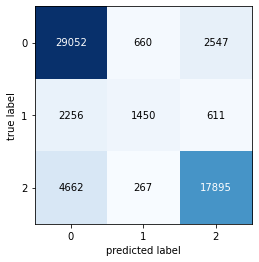

0.8147643097643098

In [107]:
plot_confusion_matrix(conf_mat)
plt.show()

accuracy_score(y_train,pred)

In [109]:
def plot_feature_importances(model):
    n_features = x_train_trans.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train_trans.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
 

In [108]:
forest.feature_importances_

array([1.72685910e-02, 4.75296962e-02, 8.87013289e-02, 8.58595371e-02,
       1.84626543e-02, 2.09918251e-02, 3.32898868e-02, 4.45885635e-02,
       5.62314187e-02, 2.36018098e-02, 1.05504819e-01, 5.74758342e-02,
       4.25823768e-02, 3.00767683e-02, 3.46480198e-02, 3.04088406e-02,
       3.84340693e-03, 3.35793379e-03, 2.43944365e-03, 3.55128116e-03,
       3.47746931e-03, 2.86964772e-03, 2.78284670e-03, 2.30140515e-03,
       2.55751161e-03, 1.20398483e-03, 6.84318802e-04, 1.29342049e-03,
       9.64006761e-04, 9.45078145e-05, 1.42487913e-04, 5.66073469e-03,
       1.48288984e-03, 3.26927281e-03, 2.09908727e-03, 2.39529277e-03,
       1.82618944e-03, 1.53472317e-04, 6.49490758e-05, 9.81567404e-03,
       1.96786999e-03, 2.60270227e-04, 2.33484642e-03, 2.74457478e-03,
       6.65975597e-03, 2.22287480e-02, 7.67169030e-06, 1.29915500e-04,
       6.43148737e-04, 3.90806647e-04, 3.06909325e-03, 2.90246309e-03,
       1.73195316e-04, 2.09740996e-04, 1.19387112e-03, 8.96637652e-04,
      

<AxesSubplot:>

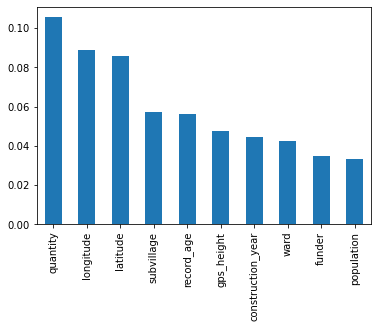

In [121]:
feat_importances = pd.Series(forest.feature_importances_, index=x_train_trans.columns)
feat_importances.nlargest(10).plot(kind='bar')

In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_score

DT_scores = cross_val_score(DT, x_train_trans, y_train,
                                scoring="accuracy", cv=5)
DT_scores.mean()

In [ ]:
# feature importance
for name, score in zip(x_train_trans[x_train_trans.columns], forest.feature_importances_):
    print(name, score)

In [ ]:
# Randomized search
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [1]:
from lightgbm import LGBMClassifier
def objective_dt(trial, X, y):

  # Now, define all the hyperparams we want to vary, and what values they are allowed
  # to take.
  #
  # Each trial, optuna will automatically choose values for each hyperparam.
  hyper_params = {
        
        "n_estimators":trial.suggest_int("n_estimators", 1100, 1700, step=10),
        "max_depth": trial.suggest_int("max_depth", 50,100 , step=5),
      
      
        "min_samples_split": trial.suggest_int("min_samples_split", 2,10, step=1),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1,8, step=1),
        #"max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 10, 1010, step=100),

       'class_weight': trial.suggest_categorical('class_weight', [None]),
         'oob_score' : True,
       # 'num_leaves':trial.suggest_int("num_leaves", 290,420, step = 10),
     # "n_neighbors" : trial.suggest_int("n_neighbours" , 1 , 10, step=1),
     # "algorithm" : trial.suggest_categorical("algorithm" , ["auto",  'ball_tree', 'kd_tree', 'brute'] ),
     # "leaf_size" : trial.suggest_int("leaf_size",10,100, step = 5),
     "random_state": 42,
        "bootstrap": True,
        "criterion" : trial.suggest_categorical('criterion', ['entropy', 'gini','log_loss']),
      
  }
    # Use the hyperparams that optuna has chosen for this trial to create a DecisionTreeClassifier
  clf = ExtraTreesClassifier(**hyper_params)

  # Run CV to see how well these hyper_params do
  cv_scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
  score = np.mean(cv_scores)

  # Whatever we return here tells optuna how well these parameters did
  return score

In [57]:
from sklearn.model_selection import cross_val_score

In [2]:
import optuna

In [3]:
study = optuna.create_study(direction="maximize")

[I 2022-07-28 11:25:01,192] A new study created in memory with name: no-name-20838566-3bb0-47f1-9d8a-032da43d741a


In [4]:
study.optimize(lambda trial: objective_dt(trial, x_train_trans, y_train), n_trials=30,  gc_after_trial=True)

[W 2022-07-28 11:25:01,230] Trial 0 failed because of the following error: NameError("name 'x_train_trans' is not defined")
Traceback (most recent call last):
  File "D:\MMA\ANACONDA\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\nishc\AppData\Local\Temp\ipykernel_3116\2305158827.py", line 1, in <lambda>
    study.optimize(lambda trial: objective_dt(trial, x_train_trans, y_train), n_trials=30,  gc_after_trial=True)
NameError: name 'x_train_trans' is not defined


NameError: name 'x_train_trans' is not defined

In [ ]:
rf = RandomForestClassifier()

rf_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_search.fit(x_train_trans, y_train)
rf_search.best_params_S

#### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=0.7,
                           bootstrap=True, n_jobs=-1)
bagging.fit(x_train_trans, y_train)

In [ ]:
bagging_scores = cross_val_score(bagging, x_train_trans, y_train,
                                scoring="accuracy", cv=5)
bagging_scores.mean()

#### Ensemble of RForest, Neural net and XGB

In [55]:
from sklearn.ensemble import VotingClassifier
forest = RandomForestClassifier(random_state=42, n_estimators=1250, min_samples_split=5,min_samples_leaf = 1,
                                oob_score=True, n_jobs=-1, max_features='auto', bootstrap=True,max_depth= 80,criterion='entropy')
neighbor = KNeighborsClassifier(n_neighbors= 5, algorithm ='kd_tree', leaf_size = 65)
lgb = LGBMClassifier(max_depth= 25, num_leaves = 310,random_state = 42)

voting_clf = VotingClassifier(estimators = [('rf',forest), ('gb',lgb), ('neigh', neighbor)],  voting='soft',weights=[1,1,1])

In [58]:
voting_clf.fit(x_train_trans, y_train)
scores = cross_val_score(voting_clf, x_train_trans, y_train,
                                scoring="accuracy", cv=5)
scores.mean()

D:\MMA\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

0.8107239057239057

#### SVM classifier

In [ ]:
svc.fit(x_train_trans, y_train)

In [ ]:
# cross-validation
svc_scores = cross_val_score(svc, x_train_trans, y_train, scoring="accuracy", cv=2)
svc_scores

#### K-NN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
neighbor = KNeighborsClassifier(n_neighbors= 5, algorithm ='kd_tree', leaf_size = 65)

In [39]:
neighbor.fit(x_train_trans, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=65)

In [42]:
# cross-validation
knn_scores = cross_val_score(neighbor, x_train_trans, y_train, scoring="accuracy", cv=5)
knn_scores

array([0.77045455, 0.76919192, 0.77138047, 0.77323232, 0.76927609])

#### lgbm classifier

In [50]:
from lightgbm import LGBMClassifier

In [ ]:
lgb = LGBMClassifier(max_depth= 25, num_leaves = 310,random_state = 666)

In [ ]:
lgb.fit(x_train_trans, y_train)



In [ ]:
# cross-validation
lgb_scores = cross_val_score(lgb, x_train_trans, y_train, scoring="accuracy", cv=5)
lgb_scores.mean()

In [ ]:


lgb_search = RandomizedSearchCV(estimator = lgb, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

lgb_search.fit(x_train_trans, y_train)
lgb_search.best_params_

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
encoder.fit(y_train)

In [ ]:
Y = encoder.transform(y_train)

In [ ]:
y_train = pd.DataFrame(Y,columns =[ 'status_group'])

In [ ]:
y_train.head()

In [ ]:
xgb = XGBClassifier(random_state=42,max_depth = 80, gamma = 6 , reg_alpha = 90,reg_lambda = 1,n_estimators = 800)

In [ ]:
xgb.fit(x_train_trans, y_train)

In [ ]:
# cross-validation
xgb_scores = cross_val_score(xgb, x_train_trans, y_train, scoring="accuracy", cv=2)
xgb_scores

### Test set predictions

In [59]:
pred_output = voting_clf.predict(test_data_trans)

In [60]:
pred_output = pd.DataFrame(pred_output, columns=['status_group'])

In [61]:
output = pd.concat([test_data['id'], pred_output.loc[:,'status_group']], axis=1)

In [62]:
output.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [63]:
output.to_csv(r"submission37.csv", index=False)